# Dizzy

In [5]:
import seaborn as sns

# call the 02-data-cleaning.ipynb notebook to bring the pecarn_tbi dataframe and the cleaned dataframe into the environment
%cd -q ../notebooks
%run ./02-data-cleaning.ipynb
%cd -q -

START: 00-load-raw-data.ipynb
  PECARN TBI data read from c:\Jan\Capstone\notebooks/TBI PUD 10-08-2013.csv into "pecarn_tbi" dataframe
START: 01-data-labelling.ipynb
START: 02-data-cleaning.ipynb
  Dropping 3 rows where Gender is NaN
  Setting 15964 rows where Ethnicity is NaN to Non-Hispanic
  Setting 2029 rows where Race is NaN and Ethnicity is Hispanic to White
  Dropping records where GCS < 14
  Dropping GCS columns as they are now redundant
  Dropping AgeInMonth
  Renaming AgeinYears to Age
  Dropping EmplType
  Dropping AgeInMonth
  Dropping High_impact_InjSev
  Renaming InjuryMech to Injury_Mechanism
  Renaming ActNorm to Acting_Normal
  Setting Acting_Normal missing data to 1 (Yes)
  Dropping Ind## columns
  Dropping Findings## columns
  Dropping CT columns
  Dropping EDCT column
  Dropping PosCT column
  Dropping EDDisposition column
  Dropping Observed column
  Dropping DeathTBI, Neurosurgery, Intub24Head, HospHeadPosCT variables
  The cleaned dataset is now available in a da

## Missing Values

In [6]:
pecarn_tbi[['Dizzy']].isna().sum()

Dizzy    15972
dtype: int64

In [7]:
data[['Dizzy']].isna().sum()

Dizzy    15123
dtype: int64

It seems like dizziness correlates with TBI

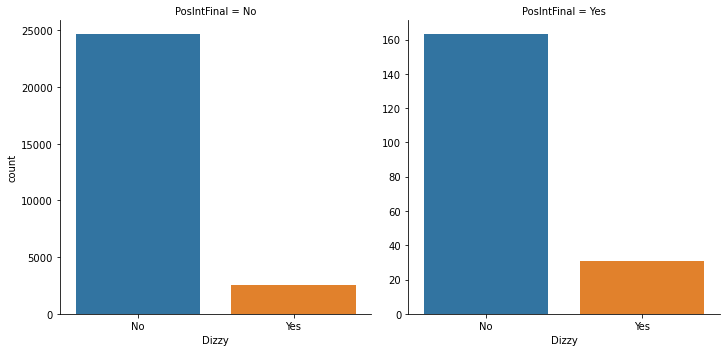

In [8]:
sns.catplot(kind='count', x='Dizzy', col='PosIntFinal', sharey=False, data=pecarn_tbi)

In [16]:
conf_matrix = pd.crosstab(data['Dizzy'], data['PosIntFinal'])
conf_matrix

PosIntFinal,No,Yes
Dizzy,,
No,24563,153
Yes,2550,28


In [25]:
# see https://stackoverflow.com/a/39266194
from scipy.stats import chi2_contingency

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [26]:
cramers_corrected_stat(pd.crosstab(data['Dizzy'], data['PosIntFinal']))

0.014874446942846006

Is there a relationship to age or inability to verbalize and Dizzy?